*Auteur* : **Nada EL KAMEL**

J'ai mis en œuvre un pipeline d'analyse entièrement reproductible basé sur Pandas qui opérationnalise directement les métriques définies dans la partie 1. En utilisant l'ensemble de données AIDev et en limitant notre analyse aux tables spécifiées dans la question 3.

# Configuration commune

In [1]:
import pandas as pd

# -----------------------------
# Chargement des tables
# -----------------------------
prs = pd.read_parquet("hf://datasets/hao-li/AIDev/all_pull_request.parquet")
repositories = pd.read_parquet("hf://datasets/hao-li/AIDev/all_repository.parquet")
users = pd.read_parquet("hf://datasets/hao-li/AIDev/all_user.parquet")
pr_comments = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_comments.parquet")
pr_reviews = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_reviews.parquet")
pr_commits = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_commits.parquet")
pr_timeline = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_timeline.parquet")
issues = pd.read_parquet("hf://datasets/hao-li/AIDev/issue.parquet")
related_issue = pd.read_parquet("hf://datasets/hao-li/AIDev/related_issue.parquet")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [2]:
dataframes = {
    "pull_request": prs,
    "pr_comments": pr_comments,
    "pr_reviews": pr_reviews,
    "pr_timeline": pr_timeline,
    "user": users,
    "pr_commits": pr_commits,
    "issue": issues,
    "related_issue": related_issue,
    "repository": repositories
}

Chaque tableau sera documenté au niveau du DataFrame à l'aide de Pandas, incluant sa forme, la structure de ses colonnes, ses types de données, ses statistiques descriptives et la distribution des valeurs manquantes. Ceci a permis une compréhension claire de l'ensemble de données avant l'analyse et a favorisé la reproductibilité.

In [3]:
# -----------------------------
# Fonction permettant de documenter un DataFrame
# -----------------------------
def document_dataframe(name, df):
    print("=" * 80)
    print(f"DATAFRAME: {name}")
    print("=" * 80)

    # Taille
    print("\nShape (rows, columns):")
    print(df.shape)

    # Colonnes
    print("\nColumns:")
    print(list(df.columns))

    # Info (schema, non-null counts, dtypes)
    print("\nDataFrame info:")
    df.info()

    # Statistiques descriptives
    print("\nDescriptive statistics (describe):")
    print(df.describe())

    # Missing values
    print("\nMissing values per column:")
    print(df.isna().sum())

    # Missing values percentage
    print("\nMissing values percentage:")
    print((df.isna().mean() * 100).round(2))


In [4]:
# -----------------------------
# Exécuter la documentation
# -----------------------------
for name, df in dataframes.items():
    document_dataframe(name, df)

DATAFRAME: pull_request

Shape (rows, columns):
(932791, 14)

Columns:
['id', 'number', 'title', 'body', 'agent', 'user_id', 'user', 'state', 'created_at', 'closed_at', 'merged_at', 'repo_id', 'repo_url', 'html_url']

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932791 entries, 0 to 932790
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          932791 non-null  int64  
 1   number      932791 non-null  int64  
 2   title       932790 non-null  object 
 3   body        924018 non-null  object 
 4   agent       932791 non-null  object 
 5   user_id     932791 non-null  int64  
 6   user        932791 non-null  object 
 7   state       932791 non-null  object 
 8   created_at  932791 non-null  object 
 9   closed_at   859927 non-null  object 
 10  merged_at   790139 non-null  object 
 11  repo_id     930292 non-null  float64
 12  repo_url    932791 non-null  object 
 13  html_url    932791 n

> DataFrame: pull_request
* Ce tableau contient des informations sur les demandes de fusion (pull requests) GitHub.

* Le DataFrame comporte 932 791 lignes et 14 colonnes, ce qui en fait un jeu de données volumineux.

* Chaque ligne représente une demande de fusion.

* Les colonnes importantes incluent l'identifiant de la demande, son titre, son auteur (utilisateur), son état, sa date de création et les informations du dépôt.

* La plupart des colonnes sont complètes, avec très peu de valeurs manquantes.

* Environ 7,8 % des demandes de fusion n'ont pas de date de fermeture (closed_at), ce qui signifie qu'elles sont toujours ouvertes.

* Environ 15 % des demandes de fusion n'ont pas été fusionnées, ce qui explique les valeurs manquantes dans la colonne merged_at.

* Le jeu de données utilise différents types de données : nombres (identifiants), texte (titres, utilisateurs) et dates.

=> En résumé, ce tableau est bien structuré et fiable pour analyser l'activité des demandes de fusion.


> DataFrame: pr_comments

* Ce tableau contient les commentaires associés aux demandes de fusion.

* Il comporte 39 122 lignes et 7 colonnes.

* Chaque ligne correspond à un commentaire sur une demande de fusion.

* Toutes les colonnes sont complètes, ce qui garantit une excellente qualité des données.

* Le tableau inclut des informations sur l'auteur du commentaire, l'identifiant de la demande de fusion, la date et le texte du commentaire.

=> Ce DataFrame est idéal pour étudier les discussions et les interactions autour des demandes de fusion.


> DataFrame: pr_reviews

* Ce tableau stocke les informations de revue de code pour les demandes de fusion.

* Il contient 28 875 lignes et 7 colonnes.

* Chaque ligne représente une revue.

* La colonne « Corps » est incomplète (environ 72 %), ce qui signifie que de nombreuses revues ont été soumises sans commentaire écrit.

* Presque toutes les informations concernant les relecteurs sont présentes.

=> Ce tableau permet d'analyser le comportement des revues (approuvées, modifications demandées, etc.), mais l'analyse textuelle est limitée par l'absence de commentaires.


> DataFrame: pr_timeline

* Ce tableau enregistre les événements survenus au cours du cycle de vie d'une demande de fusion.

* Il comporte 325 500 lignes et 8 colonnes.

* Chaque ligne correspond à un événement (par exemple : ajout d'un commit, ajout d'une étiquette, attribution).

* Plusieurs colonnes présentent de nombreuses valeurs manquantes :

    * assigné (environ 96 % de valeurs manquantes)

    * étiquette (environ 91 % de valeurs manquantes)

    * le message et l'identifiant du commit sont également souvent manquants.

* Ceci est normal, car ces informations ne sont pas systématiquement incluses dans tous les événements.

=> Ce DataFrame est utile pour étudier l'évolution des demandes de fusion au fil du temps, mais nécessite une gestion rigoureuse des valeurs manquantes.


> DataFrame: user

* Ce tableau contient les informations de profil des utilisateurs GitHub.

* Il comprend 72 189 utilisateurs et 5 colonnes.

* Chaque ligne représente un utilisateur GitHub.

* Un très faible pourcentage de valeurs (environ 0,03 %) est manquant, ce qui est négligeable.

* La plupart des utilisateurs ont peu d'abonnés et d'abonnements, tandis qu'un petit nombre d'entre eux sont très populaires.

=> Ce tableau peut être utilisé pour analyser l'activité et la popularité des utilisateurs.

In [5]:
# Créer une colonne 'author_type' dans le DataFrame 'users'
type_utilisateur = users.copy()
type_utilisateur["author_type"] = type_utilisateur["login"].apply(
    lambda x: "Bot" if "bot" in str(x).lower() else "User"
)

prs_with_author = prs.merge(
    type_utilisateur[["id", "author_type"]].rename(columns={"id": "user_id"}),
    on="user_id",
    how="left"
)
prs_with_author["is_bot"] = prs_with_author["author_type"] == "Bot"

In [6]:
# Convert date columns to datetime objects if they aren't already
prs_with_author["created_at"] = pd.to_datetime(prs_with_author["created_at"])
prs_with_author["closed_at"] = pd.to_datetime(prs_with_author["closed_at"])
prs_with_author["merged_at"] = pd.to_datetime(prs_with_author["merged_at"])

# Durée totale (création → fermeture ou fusion)
prs_with_author["duration_hours"] = (
    prs_with_author["closed_at"].fillna(prs_with_author["merged_at"]) - prs_with_author["created_at"]
).dt.total_seconds() / 3600

# Identifier les PR mergées
prs_with_author["is_merged"] = prs_with_author["merged_at"].notna()

In [8]:
# --- Métrique 1.1 : Durée moyenne de traitement
q1_m1 = prs_with_author.groupby("is_bot")["duration_hours"].mean()

# --- Métrique 1.2 : Temps avant première revue
premiere_revue = pr_reviews.groupby("pr_id")["submitted_at"].min().reset_index()
premiere_revue["submitted_at"] = pd.to_datetime(premiere_revue["submitted_at"])
prs_premiere_revue = prs_with_author[["id", "created_at", "is_bot"]].merge(
    premiere_revue, left_on="id", right_on="pr_id", how="inner"
)
prs_premiere_revue["time_to_first_review_h"] = (
    prs_premiere_revue["submitted_at"] - prs_premiere_revue["created_at"]
).dt.total_seconds() / 3600
q1_m2 = prs_premiere_revue.groupby("is_bot")["time_to_first_review_h"].mean()

# --- Métrique 1.3 : Temps avant premier commentaire
premier_commentaire = pr_comments.groupby("pr_id")["created_at"].min().reset_index()
premier_commentaire["created_at"] = pd.to_datetime(premier_commentaire["created_at"])
prs_premier_commentaire = prs_with_author[["id", "created_at", "is_bot"]].merge(
    premier_commentaire, left_on="id", right_on="pr_id", how="inner"
)
prs_premier_commentaire["time_to_first_comment_h"] = (
    prs_premier_commentaire["created_at_y"] - prs_premier_commentaire["created_at_x"]
).dt.total_seconds() / 3600
q1_m3 = prs_premier_commentaire.groupby("is_bot")["time_to_first_comment_h"].mean()

# Résultats Q1
print("Q1 – Métrique 1.1 (durée moyenne en heures):")
print(q1_m1)
print("\nQ1 – Métrique 1.2 (temps avant 1ère revue):")
print(q1_m2)
print("\nQ1 – Métrique 1.3 (temps avant 1er commentaire):")
print(q1_m3)

Q1 – Métrique 1.1 (durée moyenne en heures):
is_bot
False     6.264332
True     49.793310
Name: duration_hours, dtype: float64

Q1 – Métrique 1.2 (temps avant 1ère revue):
is_bot
False    26.856241
True     23.945996
Name: time_to_first_review_h, dtype: float64

Q1 – Métrique 1.3 (temps avant 1er commentaire):
is_bot
False    19.408909
True      0.260271
Name: time_to_first_comment_h, dtype: float64


 Interprétation des métriques :

* M1.1 – Durée totale :

→ Humains : 6.3 h | IA : 49.8 h

→ Les PR d’IA restent ouvertes ≈ 8 fois plus longtemps → traitement moins rapide.

* M1.2 – Temps avant 1ère revue :

→ Humains : 26.9 h | IA : 23.9 h

→ Légèrement plus vite revues, peut-être car plus visibles ou automatisées.

* M1.3 – Temps avant 1er commentaire :

→ Humains : 19.4 h | IA : 0.26 h

→ Les IA reçoivent un commentaire presque immédiatement → souvent par des bots ou systèmes automatisés (ex: CI, linters, règles de contribution).

**Réponse à Q1 :**

Non, les PR des agents IA ne sont pas traitées plus rapidement dans leur ensemble. Bien qu’elles reçoivent des commentaires quasi instantanés (probablement automatisés) et soient revues légèrement plus vite, elles restent ouvertes beaucoup plus longtemps et mettent plus de temps à être fermées ou mergées, ce qui indique un traitement global plus lent.


In [9]:
# --- Métrique 2.1 : Nb moyen de commentaires par PR
comment_count = pr_comments.groupby("pr_id").size().reset_index(name="n_comments")
prs_with_comments = prs_with_author[["id", "is_bot"]].merge(
    comment_count, left_on="id", right_on="pr_id", how="left"
).fillna(0)
q2_m1 = prs_with_comments.groupby("is_bot")["n_comments"].mean()

# --- Métrique 2.2 : Proportion de reviews approuvées
review_states = pr_reviews.groupby("pr_id").apply(
    lambda x: pd.Series({
        "n_approved": (x["state"] == "APPROVED").sum(),
        "n_total": len(x)
    })
).reset_index()
prs_with_reviews = prs_with_author[["id", "is_bot"]].merge(
    review_states, left_on="id", right_on="pr_id", how="left"
).fillna(0)
prs_with_reviews["approval_rate"] = prs_with_reviews["n_approved"] / prs_with_reviews["n_total"].replace(0, 1)
q2_m2 = prs_with_reviews.groupby("is_bot")["approval_rate"].mean()

# --- Métrique 2.3 : Longueur moyenne des commentaires
pr_comments = pr_comments.merge(prs_with_author[["id", "is_bot"]], left_on="pr_id", right_on="id", how="inner")
pr_comments["comment_length"] = pr_comments["body"].fillna("").str.len()
q2_m3 = pr_comments.groupby("is_bot")["comment_length"].mean()

# Résultats Q2
print("Q2 – Métrique 2.1 (moyenne commentaires/PR):")
print(q2_m1)
print("\nQ2 – Métrique 2.2 (taux d'approbation des reviews):")
print(q2_m2)
print("\nQ2 – Métrique 2.3 (longueur moyenne des commentaires):")
print(q2_m3)

/tmp/ipython-input-3445937931.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  review_states = pr_reviews.groupby("pr_id").apply(


Q2 – Métrique 2.1 (moyenne commentaires/PR):
is_bot
False    0.02699
True     0.42477
Name: n_comments, dtype: float64

Q2 – Métrique 2.2 (taux d'approbation des reviews):
is_bot
False    0.002088
True     0.028079
Name: approval_rate, dtype: float64

Q2 – Métrique 2.3 (longueur moyenne des commentaires):
is_bot
False    1616.825175
True     1584.766116
Name: comment_length, dtype: float64


Interprétation des métriques :

* M2.1 – Nb moyen de commentaires/PR :

→ Humains : 0.027 | IA : 0.425

→ 15 fois plus de commentaires sur les PR d’IA → bien plus discutées.

* M2.2 – Taux d’approbation des reviews :

→ Humains : 0.21 % | IA : 2.81 %

→ Bien que faible dans les deux cas, les reviews sur les PR d’IA sont ≈ 13 fois plus souvent approuvées. Cela peut refléter des reviews automatisées (ex: bots de sécurité/approbation conditionnelle).

* M2.3 – Longueur moyenne des commentaires :

→ Humains : 1617 caractères | IA : 1585 caractères

→ Très similaire → les commentaires ne sont pas plus courts ou plus longs. Cela suggère que les interactions humaines restent comparables en profondeur.

**Réponse à Q2 :**

Oui, les PR des agents IA reçoivent nettement plus de commentaires et un taux d’approbation des reviews plus élevé, ce qui indique qu’elles sont plus actives dans le workflow de revue. Cependant, la longueur similaire des commentaires suggère que la nature des échanges humains reste comparable. La différence quantitative vient probablement d’interactions automatisées (CI, bots) qui ciblent spécifiquement les contributions IA.

In [11]:
# --- Métrique 3.1 : Taux de fusion
q3_m1 = prs_with_author.groupby("is_bot")["is_merged"].mean()

# --- Métrique 3.2 : Nb moyen de commits par PR
commit_count = pr_commits.groupby("pr_id").size().reset_index(name="n_commits")
prs_with_commits = prs_with_author[["id", "is_bot"]].merge(
    commit_count, left_on="id", right_on="pr_id", how="left"
).fillna(0)
q3_m2 = prs_with_commits.groupby("is_bot")["n_commits"].mean()

# --- Métrique 3.3 : Proportion de PR liées à une issue
pr_with_issue = prs_with_author[["id", "is_bot"]].merge(
    related_issue[["pr_id"]].drop_duplicates(),
    left_on="id", right_on="pr_id",
    how="left", indicator=True
)
pr_with_issue["has_related_issue"] = pr_with_issue["_merge"] == "both"
q3_m3 = pr_with_issue.groupby("is_bot")["has_related_issue"].mean()

# Résultats Q3
print("Q3 – Métrique 3.1 (taux de fusion):")
print(q3_m1)
print("\nQ3 – Métrique 3.2 (commits moyens par PR):")
print(q3_m2)
print("\nQ3 – Métrique 3.3 (proportion liée à une issue):")
print(q3_m3)

Q3 – Métrique 3.1 (taux de fusion):
is_bot
False    0.854922
True     0.645997
Name: is_merged, dtype: float64

Q3 – Métrique 3.2 (commits moyens par PR):
is_bot
False    0.072531
True     0.669243
Name: n_commits, dtype: float64

Q3 – Métrique 3.3 (proportion liée à une issue):
is_bot
False    0.004978
True     0.012436
Name: has_related_issue, dtype: float64


Interprétation des métriques :

* M3.1 – Taux de fusion :

→ Humains : 85.5 % | IA : 64.6 %

→ Les PR d’IA sont ≈ 21 points de pourcentage moins souvent mergées → moins acceptées.

* M3.2 – Commits par PR :

→ Humains : 0.07 | IA : 0.67

→ Les PR d’IA contiennent 10 fois plus de commits → souvent des PR plus complexes ou automatisées (ex: dépendances, mises à jour).

* M3.3 – Liées à une issue :

→ Humains : 0.5 % | IA : 1.24 %

→ 2.5 fois plus susceptibles d’être liées à une issue → les agents IA ciblent plus souvent des tâches spécifiques documentées (ex: résolution automatique de bugs).

**Réponse à Q3 :**

Les PR des agents IA sont moins souvent intégrées malgré un meilleur ciblage des issues et un volume de travail plus élevé (plus de commits). Cela suggère que la communauté open source accepte moins facilement les contributions automatisées, peut-être en raison de leur style, granularité, ou manque de contexte. Elles sont plus "utiles" (liées à des issues) mais moins "acceptées".

In [12]:
# Ensure PRs have is_bot and is_merged
prs_with_author = prs_with_author.copy()
prs_with_author["is_merged"] = prs_with_author["merged_at"].notna()

# 1. Speed Metrics (RQ1)
first_review = pr_reviews.groupby("pr_id")["submitted_at"].min().to_frame("first_review_at") #Date de la première review par PR
first_comment = pr_comments.groupby("pr_id")["created_at"].min().to_frame("first_comment_at") #Date du premier commentaire par PR

# 2. Feedback Metrics (RQ2)
n_comments = pr_comments.groupby("pr_id").size().to_frame("n_comments") #Nombre total de commentaires par PR
review_stats = pr_reviews.groupby("pr_id")["state"].agg(
    n_total_reviews="size",
    n_approved_reviews=lambda x: (x == "APPROVED").sum()
) #Pour chaque PR : Nombre total de reviews , Nombre de reviews approuvées

review_stats["approval_rate"] = review_stats["n_approved_reviews"] / review_stats["n_total_reviews"] #Approval rate = indicateur de qualité / acceptabilité du code
avg_comment_len = pr_comments.groupby("pr_id")["body"].apply(
    lambda x: x.str.len().mean() if not x.empty else 0
).to_frame("avg_comment_length") #Mesure la richesse du feedback (plus long ≠ mieux, mais plus détaillé)

# 3. Acceptance & Context (RQ3)
n_commits = pr_commits.groupby("pr_id").size().to_frame("n_commits") #Taille / complexité de la PR
has_issue = related_issue.groupby("pr_id").size().to_frame("has_related_issue")
has_issue["has_related_issue"] = True #True si la PR est liée à une issue           PRs avec issue = plus structurées

# Merge all onto PRs
analysis_table = prs_with_author[["id", "is_bot", "is_merged", "duration_hours"]].set_index("id") #Fusion de toutes les métriques

for df in [first_review, first_comment, n_comments, review_stats[["approval_rate"]],
           avg_comment_len, n_commits, has_issue]:
    analysis_table = analysis_table.join(df, how="left")

# Compute time deltas
analysis_table["time_to_first_review_h"] = (
    pd.to_datetime(analysis_table["first_review_at"]) - pd.to_datetime(prs_with_author.set_index("id")["created_at"])
).dt.total_seconds() / 3600

analysis_table["time_to_first_comment_h"] = (
    pd.to_datetime(analysis_table["first_comment_at"]) - pd.to_datetime(prs_with_author.set_index("id")["created_at"])
).dt.total_seconds() / 3600  #Conversion en heures (total_seconds() / 3600)

# Final fillna for numeric columns
numeric_cols = [
    "duration_hours", "time_to_first_review_h", "time_to_first_comment_h",
    "n_comments", "approval_rate", "avg_comment_length", "n_commits"
]
analysis_table[numeric_cols] = analysis_table[numeric_cols].fillna(0)  #Nettoyage des valeurs manquantes
analysis_table["has_related_issue"] = analysis_table["has_related_issue"].fillna(False)

# Final clean table (one PR per row, 9 metrics + key flags)
final_table = analysis_table[[
    "is_bot", "is_merged",
    "duration_hours", "time_to_first_review_h", "time_to_first_comment_h",
    "n_comments", "approval_rate", "avg_comment_length",
    "n_commits", "has_related_issue"
]].reset_index()

# Optional: Save
final_table.to_parquet("aidev_analysis_ready_table.parquet", index=False)

/tmp/ipython-input-2418526505.py:48: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  analysis_table["has_related_issue"] = analysis_table["has_related_issue"].fillna(False)


In [13]:
final_table.head()

,id,is_bot,is_merged,duration_hours,time_to_first_review_h,time_to_first_comment_h,n_comments,approval_rate,avg_comment_length,n_commits,has_related_issue
0,3264016139,False,True,1.029722,0.0,0.0,0.0,0.0,0.0,0.0,False
1,3264021033,False,False,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,False
2,3264042289,False,False,4.883056,0.0,0.0,0.0,0.0,0.0,0.0,False
3,3264042318,False,False,4.881944,0.0,0.0,0.0,0.0,0.0,0.0,False
4,3264067496,False,True,0.159167,0.0,0.0,0.0,0.0,0.0,0.0,False


/tmp/ipython-input-634801361.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="is_bot", y=metric, data=mean_values, ax=ax, palette="viridis")
/tmp/ipython-input-634801361.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="is_bot", y=metric, data=mean_values, ax=ax, palette="viridis")
/tmp/ipython-input-634801361.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="is_bot", y=metric, data=mean_values, ax=ax, palette="viridis")
/tmp/ipython-input-634801361.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is depre

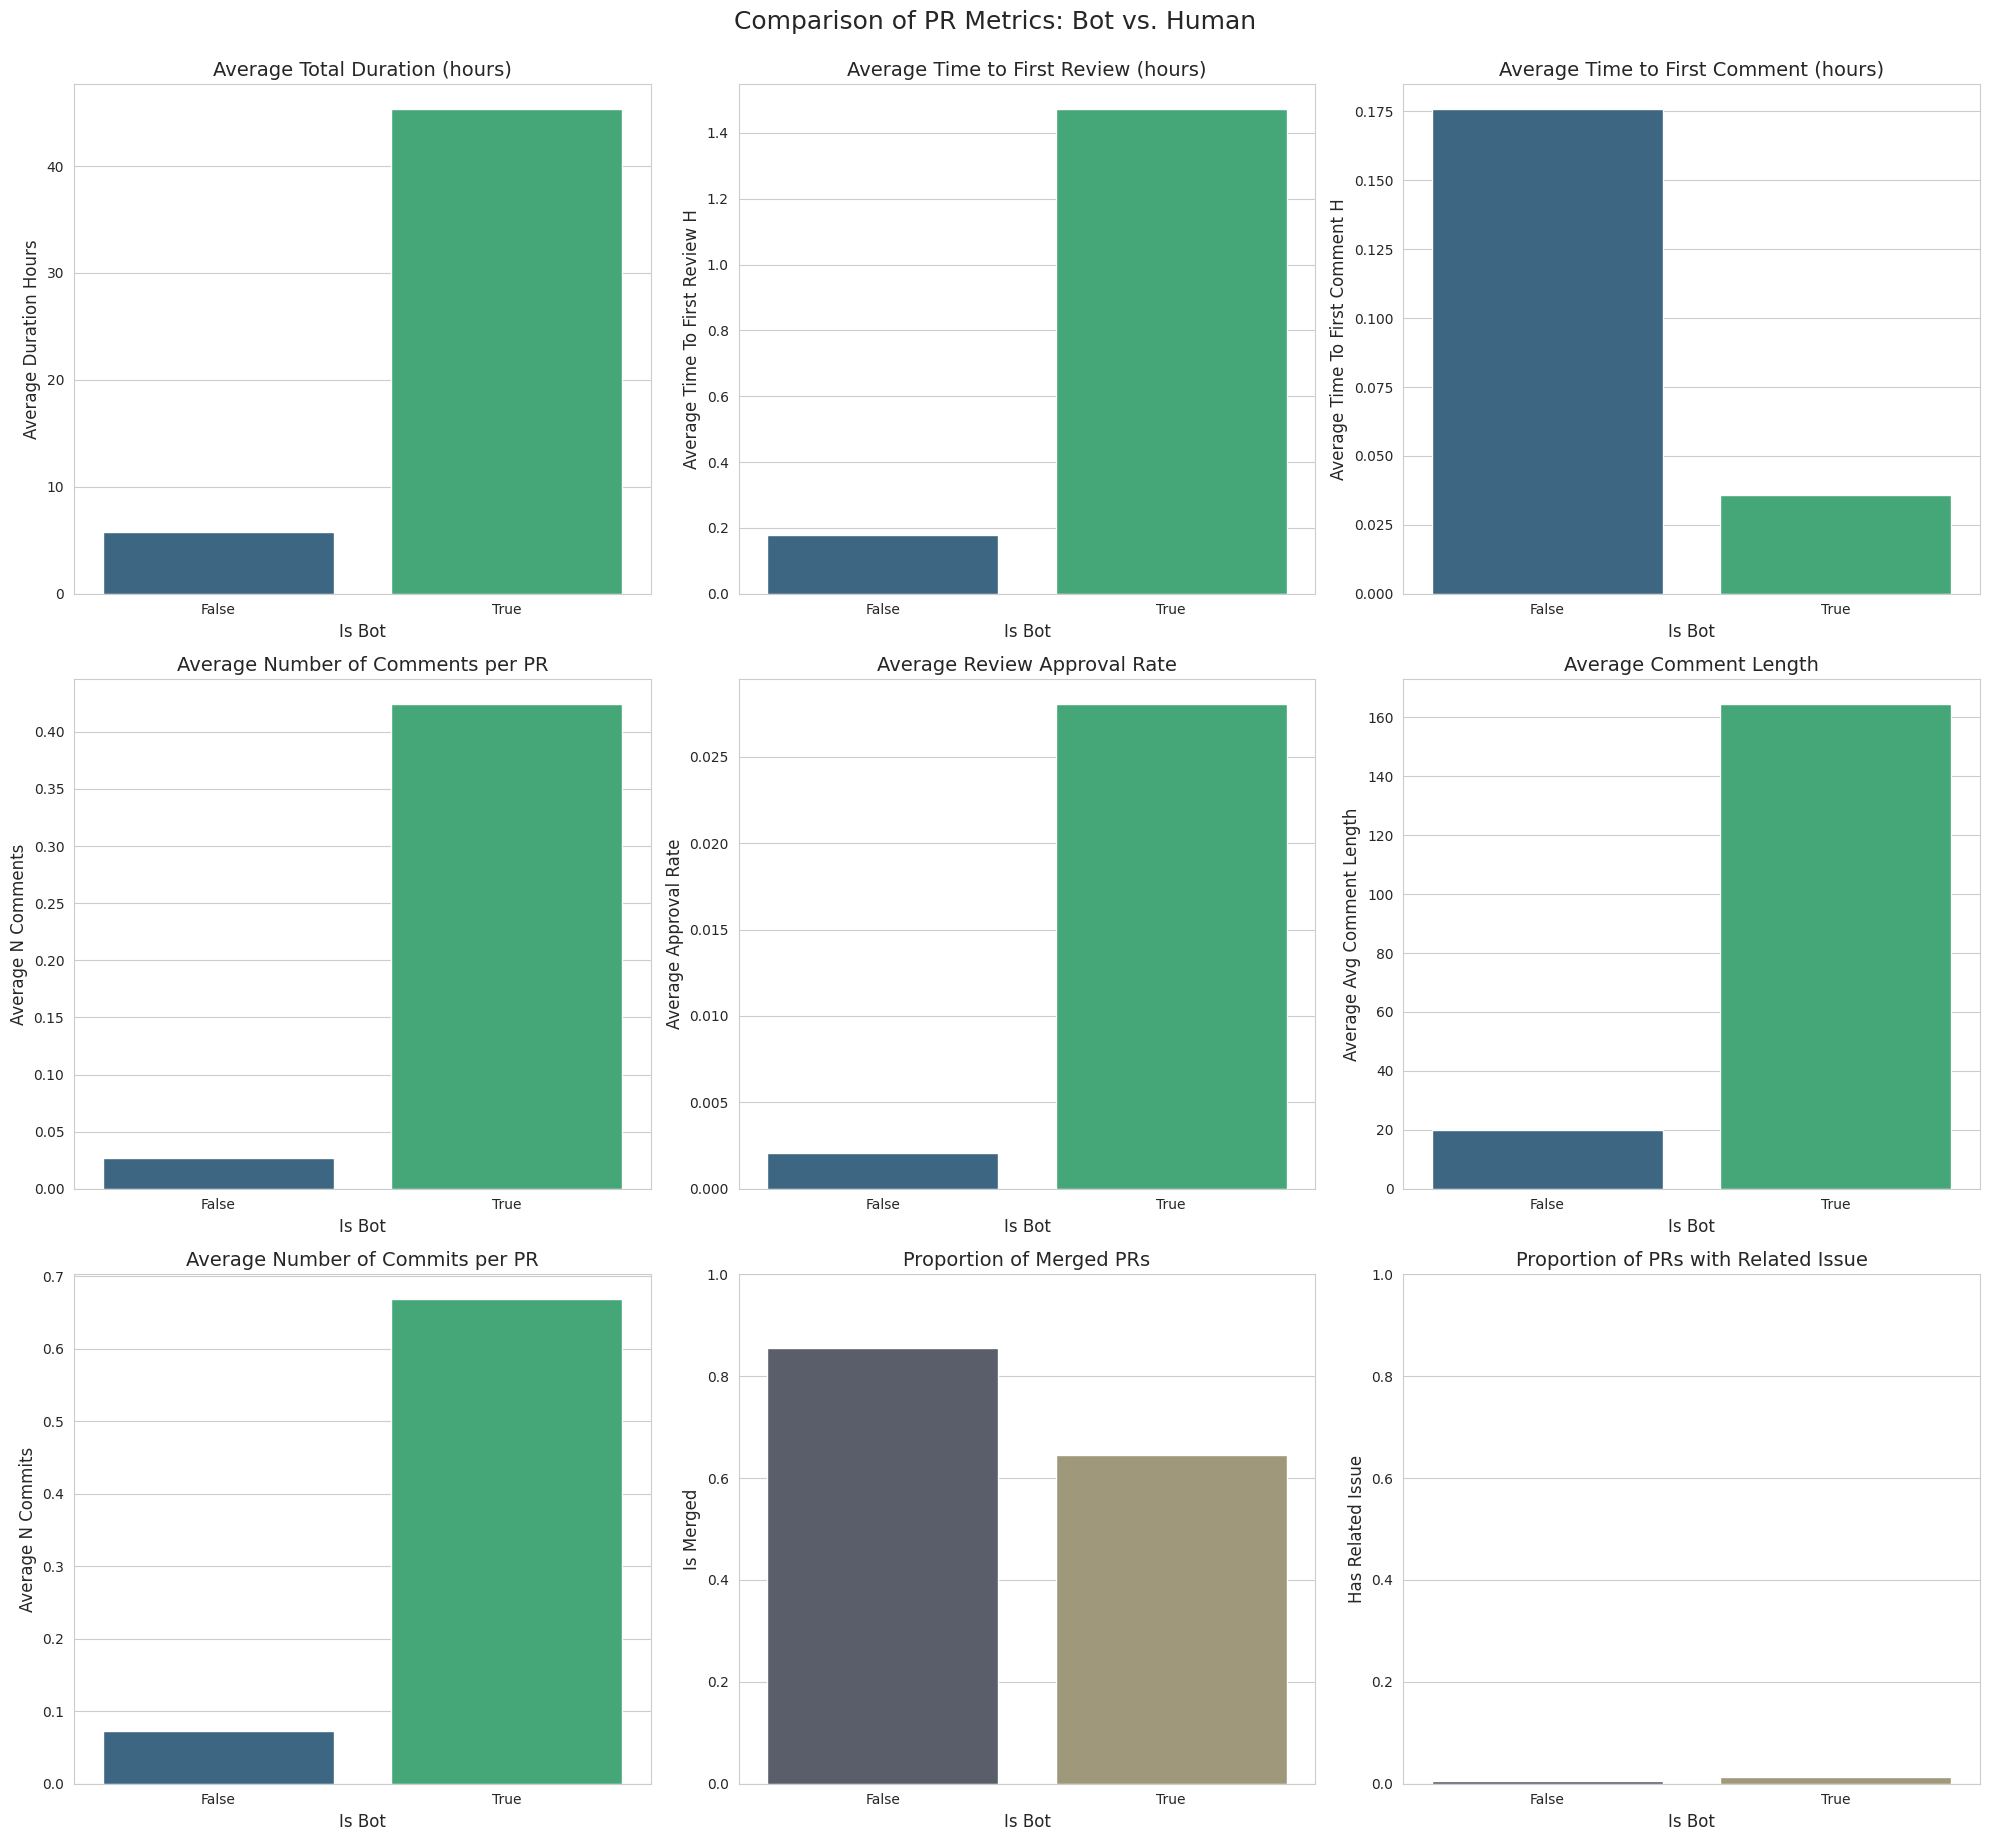

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a clean style for the plots
sns.set_style("whitegrid")

# Define the metrics to visualize
numerical_metrics = [
    "duration_hours",
    "time_to_first_review_h",
    "time_to_first_comment_h",
    "n_comments",
    "approval_rate",
    "avg_comment_length",
    "n_commits"
]

boolean_metrics = [
    "is_merged",
    "has_related_issue"
]

# Create a figure with a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Titles for the plots
plot_titles = {
    "duration_hours": "Average Total Duration (hours)",
    "time_to_first_review_h": "Average Time to First Review (hours)",
    "time_to_first_comment_h": "Average Time to First Comment (hours)",
    "n_comments": "Average Number of Comments per PR",
    "approval_rate": "Average Review Approval Rate",
    "avg_comment_length": "Average Comment Length",
    "n_commits": "Average Number of Commits per PR",
    "is_merged": "Proportion of Merged PRs",
    "has_related_issue": "Proportion of PRs with Related Issue"
}

# Iterate and plot numerical metrics using bar plots of means
for i, metric in enumerate(numerical_metrics):
    ax = axes[i]
    mean_values = final_table.groupby("is_bot")[metric].mean().reset_index()
    sns.barplot(x="is_bot", y=metric, data=mean_values, ax=ax, palette="viridis")
    ax.set_title(f"{plot_titles[metric]}", fontsize=14)
    ax.set_xlabel("Is Bot", fontsize=12)
    ax.set_ylabel(f"Average {metric.replace('_', ' ').title()}", fontsize=12)

# Iterate and plot boolean metrics (proportions)
for i, metric in enumerate(boolean_metrics):
    ax = axes[len(numerical_metrics) + i] # Continue from where numerical plots left off
    # Calculate proportions for boolean metrics
    proportions = final_table.groupby("is_bot")[metric].mean().reset_index()
    sns.barplot(x="is_bot", y=metric, data=proportions, ax=ax, palette="cividis")
    ax.set_title(f"{plot_titles[metric]}", fontsize=14)
    ax.set_xlabel("Is Bot", fontsize=12)
    ax.set_ylabel(metric.replace('_', ' ').title(), fontsize=12)
    ax.set_ylim(0, 1) # Proportions are between 0 and 1

# Hide any unused subplots (if less than 9 plots)
for i in range(len(numerical_metrics) + len(boolean_metrics), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle("Comparison of PR Metrics: Bot vs. Human", y=1.02, fontsize=18)
plt.show()

# Conclusion
Les agents IA participent activement au processus de revue (plus de commentaires, plus de commits, liens aux issues), mais leurs contributions sont moins intégrées. Cela souligne un écart entre l’activité automatisée et l’acceptation communautaire. Pour améliorer l’impact des IA, il faudrait probablement mieux aligner leurs contributions sur les normes sociales et techniques des projets open source.